In [1]:
import pandas as pd
from tqdm import tqdm
import ast
import math

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None

tqdm.pandas()

new_events_csv = f'../../generated/new_events_from_comet/ROCStories_with_new_triples_formatted_sample.csv'
new_events_df = pd.read_csv(new_events_csv, sep='\t', header=0)

forward_rels = ["xWant", "isBefore", "xEffect"]
backward_rels = ["xIntent", "isAfter", "xNeed"]


def forward_filter(triple):
    return triple[1] in forward_rels


def backward_filter(triple):
    return triple[1] in backward_rels


def get_forward_triples(triples, index):
    forward_events = []
    for triple in triples:
        if triple[1] == forward_rels[index]:
            forward_events.append(triple)
    return forward_events


def get_backward_events(triples, index):
    backward_events = []
    for triple in triples:
        if triple[1] == backward_rels[index]:
            backward_events += triple[2]
    return [a.strip() for a in backward_events]

In [57]:
new_events_not_formatted_csv = f'../../generated/new_events_from_comet/ROCStories_with_new_triples_not_formatted_part0_sample.csv'
new_events_not_formatted_df = pd.read_csv(new_events_not_formatted_csv, sep='\t', header=0)

In [58]:
new_events_not_formatted_df[new_events_not_formatted_df['storyid']=='000d05af-5db1-4d9d-b4e2-6c01b108b0b1']

,Unnamed: 0,storyid,sentence_id,new_events
6114,6114,000d05af-5db1-4d9d-b4e2-6c01b108b0b1,sentence_1,"[['Brenna and I', 'be', 'best friends'], 'xWant', [' to spend time with her', ' to spend time with them', ' to go on a date', ' to hang out with her', ' to hang out with them', ' to have fun with her', ' to spend time together', ' to be friends forever', ' to have fun', ' to hang out']]"
6115,6115,000d05af-5db1-4d9d-b4e2-6c01b108b0b1,sentence_1,"[['Brenna and I', 'be', 'best friends'], 'isBefore', [' have a good time', ' talk to each other', ' have fun with friends', ' have fun with her', ' meet new people', ' get to know them', ' have a good relationship', ' get to know someone', ' BRILL', ' meet new friends']]"
6116,6116,000d05af-5db1-4d9d-b4e2-6c01b108b0b1,sentence_1,"[['Brenna and I', 'be', 'best friends'], 'xEffect', [' to be best friends', ' has a good time', ' has a new friend', ' have a good time', ' get to know someone', ' gets to know someone', ' get to know them', ' makes new friends', ' has a friend']]"
47199,47199,000d05af-5db1-4d9d-b4e2-6c01b108b0b1,sentence_2,"[['I', 'talked', 'about her behind her back'], 'xWant', [' to get away from her', ' to get away with it', ' to keep it a secret', ' to get revenge on her', ' to make her feel better', ' to get away with something', ' to make her feel bad', ' to get away from them', ' to hurt her feelings', ' talk to someone else']]"
47200,47200,000d05af-5db1-4d9d-b4e2-6c01b108b0b1,sentence_2,"[['I', 'talked', 'about her behind her back'], 'isBefore', [' PersonY gets mad at PersonY', ' PersonY finds out about it.', ' PersonY finds out about the gossip', ' PersonY finds out about PersonY', ' PersonY finds out about the secret', ' PersonX finds out about the gossip', ' PersonX goes to jail.', ' PersonY finds out about it', ' PersonY finds out the truth', ' PersonX goes to jail']]"
47201,47201,000d05af-5db1-4d9d-b4e2-6c01b108b0b1,sentence_2,"[['I', 'talked', 'about her behind her back'], 'xEffect', [' gets yelled at', ' talk about her', ' talk to her', ' talk to someone', ' talk about them', ' talk to person', ' talk about someone', ' gossiping', ' talk about']]"
47202,47202,000d05af-5db1-4d9d-b4e2-6c01b108b0b1,sentence_2,"[['I', 'talked', 'about her behind her back'], 'xIntent', [' to be sneaky', ' to be secretive', ' to keep secrets', ' to hurt someone', ' to be mean', ' to hurt her', ' to gossip', ' gossiping', ' gossip']]"
47203,47203,000d05af-5db1-4d9d-b4e2-6c01b108b0b1,sentence_2,"[['I', 'talked', 'about her behind her back'], 'isAfter', [' PersonY gets mad at PersonY', ' PersonX gets mad at PersonX', ' PersonY gets mad at me.', ' PersonX gets mad at me.', ' PersonY gets mad at PersonX', ' PersonX gets mad at PersonY', ' PersonX goes to jail.', ' PersonY gets mad at me', ' PersonX gets mad at me', ' PersonX goes to jail']]"
47204,47204,000d05af-5db1-4d9d-b4e2-6c01b108b0b1,sentence_2,"[['I', 'talked', 'about her behind her back'], 'xNeed', [' to talk to her', ' to talk to someone', ' to have a secret', ' to make a plan', ' to talk to them', ' to have a conversation', ' to find her', ' talk to someone', ' talk to her', ' to know her']]"
209067,209067,000d05af-5db1-4d9d-b4e2-6c01b108b0b1,sentence_4,"[['her', 'started', 'ignoring me'], 'xWant', [' to ignore me back', ' stop talking to me', ' talk to someone else', ' to be left alone', ' to ignore me too', ' to talk to someone', ' to ignore me', ' to talk to me', ' to avoid me', ' talk to someone']]"


In [ ]:
res[res['storyid']=='000d05af-5db1-4d9d-b4e2-6c01b108b0b1']

In [2]:
new_events_df.iloc[0:10]

Unnamed: 0  Unnamed: 0.1                               storyid  \
0           0             0  000d05af-5db1-4d9d-b4e2-6c01b108b0b1   
1           1             1  0027a743-92e4-4747-a7d6-1b0414211d74   
2           2             2  0056e52d-8cb1-476d-acfc-55ca1956c3ad   
3           3             3  0059a5df-25ab-4edc-86d1-44f7c5780876   
4           4             4  005da187-c8f3-4a1e-80c4-e43bcf36775f   
5           5             5  00658324-66e3-4b65-8285-7d989917f646   
6           6             6  006b3da2-44cd-4d43-9206-6bb4f81469e1   
7           7             7  006f7611-5c4a-4b1d-ab13-053bcac09a57   
8           8             8  007677ad-df55-4b02-a74b-dd8b65cb4603   
9           9             9  009ae11b-7013-4222-afe7-899da1cda381   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       sentence_1  \
0                                                                                                                                                                                                                                     

In [1]:
def keep_top_k_elements(l, k):
    if len(l) < k:
        return set(l)
    else:
        return set(l[:k])

In [2]:
n_rels = len(forward_rels)
pruned_triples = [[] for _ in range(5)]
deleted_triples = [[] for _ in range(5)]
for idx, row in tqdm(new_events_df.iterrows()):
    print(f'row {idx}')
    for f in range(1, 5):
        print(f'row {idx}, sentence {f}')
        triples_f = row[f'sentence_{f}']
        if isinstance(triples_f, float):
            pruned_triples[f-1].append([])
            continue
        triples_f = ast.literal_eval(triples_f)
        forward_events = list(filter(forward_filter, triples_f))
        backward_events = []
        for b in range(f+1, 6):
            triples_b = row[f'sentence_{b}']
            if not isinstance(triples_b, float):
                triples_b = ast.literal_eval(triples_b)
                backward_events += list(filter(backward_filter, triples_b))
        pruned_triples_f = []
        for rel in range(n_rels):
            print(f'row {idx}, sentence {f}, relation {forward_rels[rel]}')
            ft = get_forward_triples(forward_events, rel)
            be = get_backward_events(backward_events, rel)
            new_ft = []
            for triple in ft:
                triple_copy = [a for a in triple]
                triple_copy[2] = set([event.strip() for event in triple[2] if event.strip() in be])
                if triple_copy[2]:
                    new_ft.append(triple_copy)
            
            pruned_triples_f += new_ft
        pruned_triples[f-1].append(pruned_triples_f)

for f in range(1, 5):
    new_events_df[f'pruned_comet{f}'] = pruned_triples[f-1]

NameError: name 'forward_rels' is not defined

In [45]:
def count_triples(triples):
    count = 0
    for triple in triples:
        count += len(triple[2])
    return count

In [47]:
for f in range(1,5):
    new_events_df[f'pruned_events_count{f}'] = new_events_df[f'pruned_comet{f}'].apply(count_triples)

In [48]:
from matplotlib import pyplot as plt

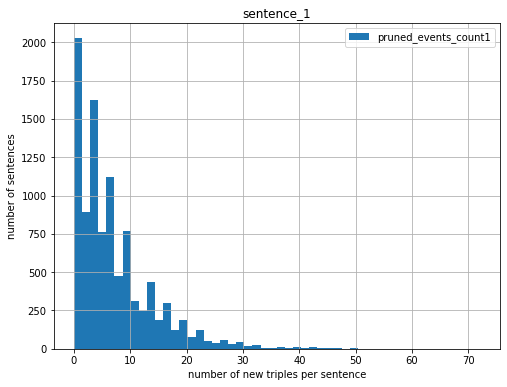

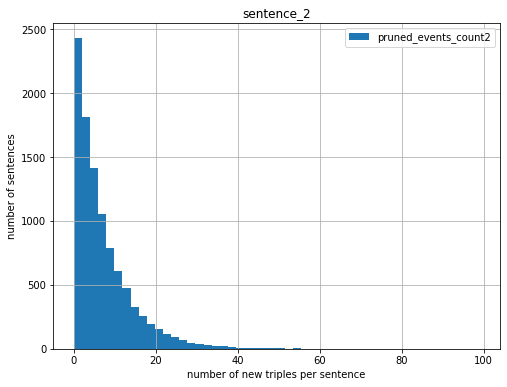

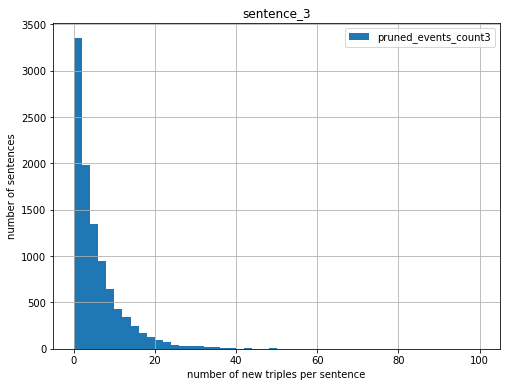

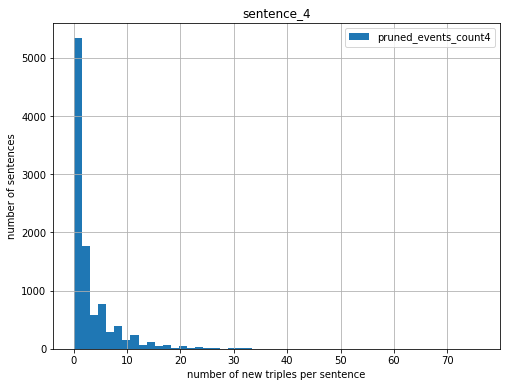

In [49]:
for f in range(1,5):
    hist = new_events_df.hist(bins=50, legend=True, figsize=(8,6),column=f'pruned_events_count{f}')

    plt.xlabel('number of new triples per sentence')
    plt.ylabel('number of sentences')
    plt.title(f'sentence_{f}')

In [52]:
roc_stories_triples_csv = '../../generated/knowledge-triple-extraction/ROCStories_resolved_with_knowledge_triples.csv'
roc_stories_triples_df = pd.read_csv(roc_stories_triples_csv, sep='\t', header=0)

res_df = roc_stories_triples_df.iloc[:10000].merge(new_events_df, how='outer', on='storyid')

In [68]:
del res_df['srl_r1']
del res_df['Unnamed: 0_x']
del res_df['Unnamed: 0.1_x']
del res_df['Unnamed: 0.1.1']
del res_df['Unnamed: 0.1.1.1']
del res_df['Unnamed: 0_y']
del res_df['Unnamed: 0.1_y']

In [70]:
res_df.sample(10)

storyid                        storytitle  \
389   8e992bd6-5fc5-4efa-8969-6f88c5909815                          Big Bird   
5519  070759b0-8817-4b0f-8d69-9394a98bf4a5                Pizza Delivery Man   
1578  e3ab0722-8bc6-48cc-a692-9c4fb76573f0                          The Yard   
8970  d51c0a69-62e6-461b-94fe-c6a6947746ee                             Sorry   
8379  9633899c-fee6-4e15-a759-ff69e1bb8a62                Sally Gets a Puppy   
9515  72de81ee-3ea9-4222-b5b1-27f03b03d9f6   Brad Reconnects With His Father   
2284  aa77ccd6-46a8-4fec-9f59-ccd33a703847  The little brat down the street.   
6111  0fc3252a-e782-400b-88ea-5922893aecda                            Pebble   
545   6643d2b6-2a18-4413-b5a5-bb9bad7ebd1f                   Leprechaun Trap   
8075  a88c0dc8-fdfa-4c18-a4c2-cbda7bb78996              Kayaking the rapids.   

                                                      sentence1  \
389                                         Victor is homeless.   
5519  Being a pizza delivery man, Harold knew everyone in town.   
1578                               Jim played ball in the yard.   
8970                My neighbor came over for tea this morning.   
8379                            Sally wanted a puppy for years.   
9515             Brad's father had abandoned him when he was 4.   
2284    There was this kid that lived a few houses down street.   
6111                      Kim was driving home on  the highway.   
545                     I once made a leprechaun trap as a kid.   
8075  Kelly and her friend went to the river with their kayaks.   

                                                                 sentence2  \
389                          He was able to buy a big bird costume though.   
5519  He never thought much about the people he worked for, until one day.   
1578                                      His friends wanted to come over.   
8970                         She sat down on my couch while I prepared it.   
8379                               She got good grades on her report card.   
9515              Brad was now 25 and wanted to reconnect with his father.   
2284                                                  Her name was Jackie.   
6111              A small pebble was kicked up by the car in front of her.   
545               I really fantasized that I'd find a leprechaun in there.   
8075          They set up their kayaks and climbed in to begin their trek.   

                                                                   sentence3  \
389                            He started to wear it in Times Square in NYC.   
5519           It was Harold's birthday and he was upset for having to work.   
1578                                                  Jim wouldn't let them.   
8970                                Carefully, I placed the tea next to her.   
8379  She showed her parents and they said she could have one because of it.   
9515       Brad was able to obtain his father's number through the internet.   
2284                                    She was always getting into trouble.   
6111                        Kim heard the sound of the pebble hit the glass.   
545      I put candy, drawings, and things inside to attract the leprechaun.   
8075  All of a sudden, the rapids became extreme and they were dragged away.   

                                                             sentence4  \
389                       He was able to get a decent amount of money.   
5519         The first house he arrived at, however, changed his mood.   
1578                                              Then, jim got bored.   
8970         When she picked it up she shook, spilling tea everywhere.   
8379               She looked online and saw someone giving them away.   
9515                   They scheduled a meeting at a local restaurant.   
2284  One time she broke my neighbor's glass sliding doors on purpose.   
6111                       She worried it would damage the windshield.   
545       